In [ ]:
%matplotlib inline
# Canny Method
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
#img    = cv2.imread('DDH-184.jpeg')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)
#threshold1, threshhold2 = 5, 95
threshold1, threshhold2 = 95, 110
r_canny = 255 - cv2.Canny(g_gray, threshold1, threshhold2, apertureSize = 3, L2gradient = True) # <- 255-をつけることで、白黒反転する

fig, axs = plt.subplots(1, 2)
axs[0].imshow(r_canny, cmap='gray')
axs[0].set_title('Canny Edge Detection')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
# Sobel Method
import numpy as np
import cv2
import os
from PIL import Image

img    = cv2.imread('lena.png')
#img    = cv2.imread('DDH-184.jpeg')
gray   = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
g_gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Sobel フィルターの適用
sobel_x = cv2.Sobel(g_gray, cv2.CV_32F, dx = 1, dy = 0, ksize = 3)
sobel_y = cv2.Sobel(g_gray, cv2.CV_32F, dx = 0, dy = 1, ksize = 3)

# 勾配の絶対値を計算
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)

# x, y 方向の勾配を合成
sobel_all = 255 - cv2.addWeighted(sobel_x, 0.5, sobel_y, 0.5, 0) # <- 255-をつけることで、白黒反転する

fig, axs = plt.subplots(1, 2)
axs[0].imshow(sobel_all, cmap='gray')
axs[0].set_title('Edge Detection')
axs[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Original Image')
plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img = cv2.imread("ng_images/ngimage_0.jpg")
#print("img.shape", img.shape)

new_width  = 125
new_height = 125
dsize      = (new_width, new_height)
new_image  = cv2.resize(img, dsize)

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img              = cv2.imread("ng_images/ngimage_0.jpg")
#print("img.shape", img.shape)
original_height, original_width = img.shape[:2]
aspect_ratio     = original_width / original_height
target_width     = 100
transform_height = int(target_width * aspect_ratio)
dsize            = (target_width, transform_height)
new_image        = cv2.resize(img, dsize, interpolation=cv2.INTER_AREA)
print("new_image.shape", new_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

#img              = cv2.imread("ng_images/ngimage_0.jpg")
img              = cv2.imread("photo/img2.jpg")
#print("img.shape", img.shape)
scale_percent_x, scale_percent_y = 0.4 , 0.4 # 40%縮小
new_image = cv2.resize(img, None, fx = scale_percent_x, fy = scale_percent_y, interpolation=cv2.INTER_AREA)
#cv2.imwrite("photo/img2_resized.jpg", new_image)
print("new_image.shape", new_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(5, 2))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()

original img.shape (231, 410, 3)
resize new_image.shape (462, 820, 3)


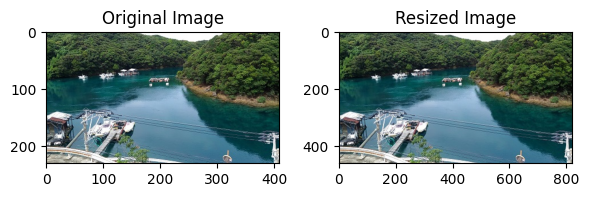

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

cc = lambda x : cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

img              = cv2.imread("photo/img2.jpg")
print("original img.shape", img.shape)
scale_percent_x, scale_percent_y = 2.0 , 2.0 # 40%縮小
new_image = cv2.resize(img, None, fx = scale_percent_x, fy = scale_percent_y, interpolation=cv2.INTER_CUBIC)
#new_image = cv2.resize(img, None, fx = scale_percent_x, fy = scale_percent_y)
cv2.imwrite("photo/img2_resized.jpg", new_image)
print("resize new_image.shape", new_image.shape)

fig, ax = plt.subplots(1, 2, figsize=(6, 3))
ax[0].imshow(cc(img))  
ax[0].set_title('Original Image')
ax[1].imshow(cc(new_image))
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()